In [180]:
import random
import scipy
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [259]:
def generate_sample(sample_size, sample_names):
    K = len(sample_names)
    means = {}
    for i, sample in enumerate(sample_names):
        means[sample] = [K * i/(K-1), K * 1- i/(K-1)]
    cov = scipy.eye(2) / 10
    mean_size = 10
    sample_cov = scipy.eye(2) / 5
    
    sample_means  = {}
    for sample in sample_names:
        sample_means[sample] = scipy.array(scipy.random.multivariate_normal(means[sample], cov, mean_size))
    
    samples = {}
    for sample in sample_names:
        samples[sample] = scipy.array([
                scipy.random.multivariate_normal(sample_means[sample][random.randint(0, 9)], sample_cov) for _ in range(sample_size)
            ])
    
    return samples, sample_means

In [260]:
sample_size = 100
categories = ['Blue', 'Orange', 'Green', 'Red', 'Purple']
data_sample, true_sample_means = generate_sample(sample_size, categories)

In [261]:
data = {}
data['x'] = scipy.concatenate(tuple(data_sample.values()))
data['y'] = scipy.concatenate(
    ([scipy.zeros(sample_size) + i for i in range(len(categories))])
)

In [262]:
x_min = data['x'][:, 0].min()
x_max = data['x'][:, 0].max()
y_min = data['x'][:, 1].min()
y_max = data['x'][:, 1].max()
print(x_min, x_max, y_min, y_max)

-1.3160816739060897 6.445266774603777 2.082982948136917 6.324435559573447


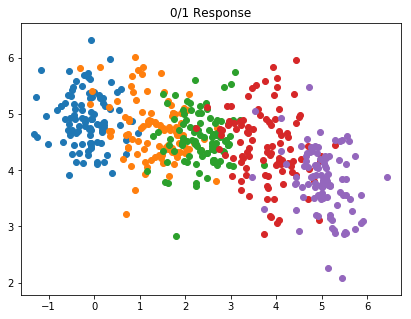

In [263]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.clear()
for i, group in enumerate(categories):
    ax1.plot(data_sample[group][:, 0], data_sample[group][:,1], 'o', color = 'C{}'.format(i))
ax1.set_title('0/1 Response')

SIDE_BLANK = 0.3
ax1.set_xlim((x_min - SIDE_BLANK, x_max + SIDE_BLANK))
ax1.set_ylim((y_min - SIDE_BLANK, y_max + SIDE_BLANK))
plt.show()

In [264]:
GRID_SIZE = 0.1
grid = scipy.array([
        (i, j) 
        for i in scipy.arange(x_min - SIDE_BLANK, x_max + SIDE_BLANK, GRID_SIZE) 
        for j in scipy.arange(y_min - SIDE_BLANK, y_max + SIDE_BLANK, GRID_SIZE)
    ])

In [265]:
def get_bayes_density(observations: scipy.ndarray, sample_mean) -> scipy.ndarray:
    mean_cov = scipy.eye(2) / 5
    densities = scipy.array([
            scipy.stats.multivariate_normal.pdf(observations, mean = m, cov = mean_cov)
            for m in sample_mean
        ])
    return densities

In [266]:
densities = {}
max_densities = scipy.zeros(len(grid))
for group in categories:
    densities[group] = get_bayes_density(grid, true_sample_means[group]).mean(axis = 0)
    max_densities = scipy.maximum(densities[group], max_densities)

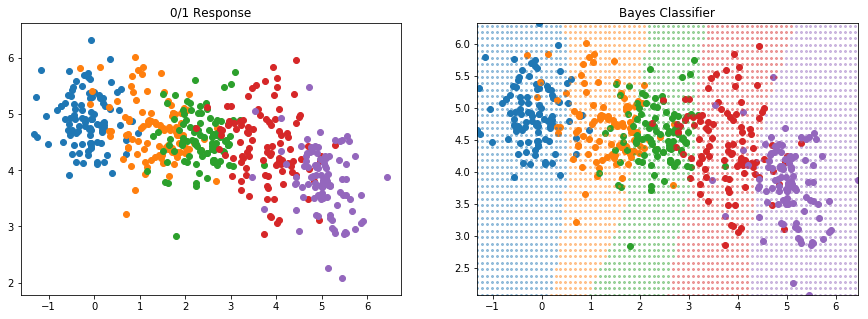

In [267]:
ax2 = fig.add_subplot(1, 2, 2)
ax2.clear()
# original data
for i, group in enumerate(categories):
    ax2.plot(data_sample[group][:, 0], data_sample[group][:, 1], 'o', color = 'C{}'.format(i))

# bayes classifier
marks = {}
for i, group in enumerate(categories):
    marks[group] = max_densities == densities[group]

# plot classifier
for i, group in enumerate(categories):
    ax2.plot(grid[marks[group], 0], grid[marks[group], 1], 'o', color = 'C{}'.format(i), markersize = 2, alpha = 0.4)

ax2.set_xlim((x_min, x_max))
ax2.set_ylim((y_min, y_max))
ax2.set_title('Bayes Classifier')

fig